#### appunti MIP


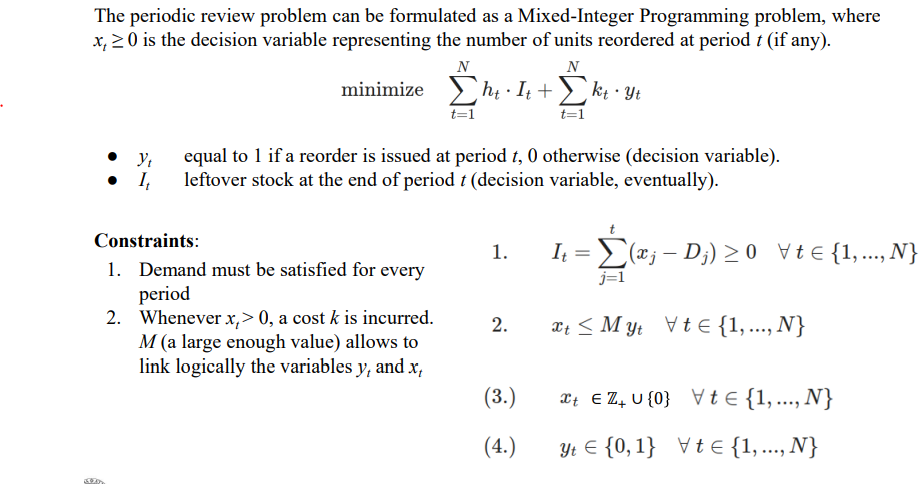

## ESERCIZIO 2:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


D = [12, 4, 1, 5, 1, 15, 51, 2, 13, 9, 11, 12, 4, 11, 12, 42, 13, 9, 11]
N = len(D)
kc = 400
hc = 2
ke = 200
he = 8


M = 10000
X_eco = np.zeros(N)
Y_eco = np.zeros(N)
X_env = np.zeros(N)
Y_env = np.zeros(N)
X_mix = np.zeros(N)
Y_mix = np.zeros(N)


def BarChartPlot(X_values, Title):
    # Plotting X values
    plt.bar(range(N), X_values, color='green', label='X values')
    plt.xlabel('Time Period (t)')
    plt.ylabel('ReOrderQuantities')
    plt.xticks(range(0, N, 1))  # Set x-axis interval to 1

    plt.title(Title)
    plt.legend()
    plt.show()
    return 


##### 1.a Economic Optim

Focusing on economic performance, what is the minimum cost achievable? For which
combination of decision variables is this given?


solution for: Periodic review ECONOMIC
objective: 2198
status: OPTIMAL_SOLUTION(2)
y_0 = 1
y_6 = 1
y_14 = 1
X_0 = 38
X_6 = 113
X_14 = 87
Minimum economical cost achivable: 2198.0


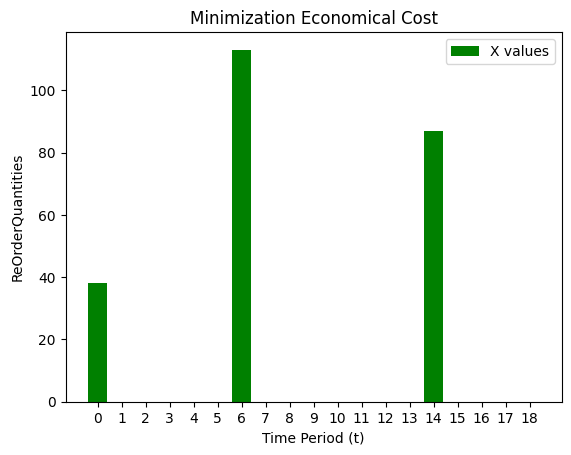

In [2]:
###############    ECONOMIC hc,kc
from docplex.mp.model import Model
mdl = Model(name = "Periodic review ECONOMIC")

y = mdl.binary_var_list(N, name ="y")
X = mdl.integer_var_list(N, name = "X")

for t in range(N):
    mdl.add_constraint(mdl.sum((X[j]-D[j]) for j in range(t+1)) >=0)

for t in range(N):
    mdl.add_constraint(X[t]<=M*y[t])

for t in range(N):
    mdl.add_constraint(X[t]>=0)

mdl.minimize(mdl.sum(mdl.sum((X[j]-D[j]) for j in range(t+1))*hc +  kc*y[t] for t in range(N)))

sol = mdl.solve()
sol.display()

min_obj_economic = sol.objective_value
for i in range(N):
    X_eco[i] = sol.get_value(X[i])
    Y_eco[i] = sol.get_value(y[i])

print("Minimum economical cost achivable:", min_obj_economic)
BarChartPlot(X_eco, 'Minimization Economical Cost')

##### 1.b Enviromental Optim


Focusing on environmental performance, what is the minimum emissions achievable?
For which combination of decision variables is this given?

solution for: Periodic review ENVIROMENTAL
objective: 2336
status: OPTIMAL_SOLUTION(2)
y_0 = 1
y_5 = 1
y_6 = 1
y_8 = 1
y_10 = 1
y_13 = 1
y_15 = 1
y_17 = 1
X_0 = 23
X_5 = 15
X_6 = 53
X_8 = 22
X_10 = 27
X_13 = 23
X_15 = 55
X_17 = 20
Minimum enviromental cost achivable: 2336.0


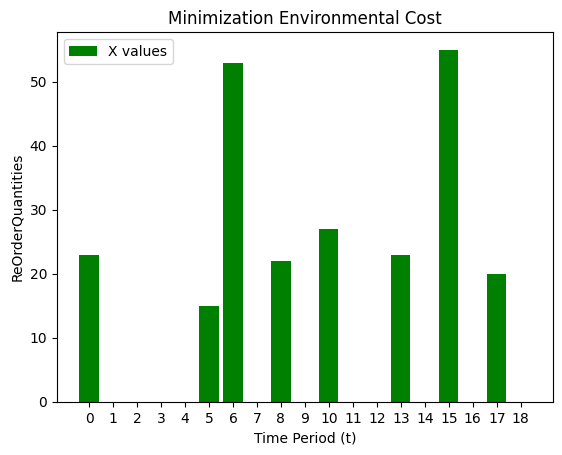

In [3]:
###############    ENVIROMENTAL he,ke

from docplex.mp.model import Model
mdl2 = Model(name = "Periodic review ENVIROMENTAL")
y = mdl2.binary_var_list(N, name ="y")
X = mdl2.integer_var_list(N, name = "X")

for t in range(N):
    mdl2.add_constraint(mdl2.sum((X[j]-D[j]) for j in range(t+1)) >=0)

for t in range(N):
    mdl2.add_constraint(X[t]<=M*y[t])

for t in range(N):
    mdl2.add_constraint(X[t]>=0)

mdl2.minimize(mdl2.sum(mdl2.sum((X[j]-D[j]) for j in range(t+1))*he +  ke*y[t] for t in range(N)))

sol2 = mdl2.solve()
sol2.display()
min_obj_env = sol2.objective_value

for i in range(N):
    X_env[i] = sol2.get_value(X[i])
    Y_env[i] = sol2.get_value(y[i])
    

print("Minimum enviromental cost achivable:", round(min_obj_env,2))
BarChartPlot(X_env,'Minimization Environmental Cost')

# MixOptim_EnvCost1 = sum(sum((X_mix[j]-D[j]) for j in range(t+1))*he +  ke*Y_mix[t] for t in range(N))
# MixOptim_EcoCost1 = sum(sum((X_mix[j]-D[j]) for j in range(t+1))*hc +  kc*Y_mix[t] for t in range(N))


##### 1.c From economic to enviromental


If the company switched from the economic perspective to the environmental one,
what is the percentage improvement in the total emission objective function? At what
increase of costs is this achievable?

In [4]:
# prendo x e y da quelli del primo caso e li valuto con i dati del secondo 
EconomOptim_EcoCost = round(min_obj_economic,2)
EconomOptim_EnvCost = round(sum(sum((X_eco[j]-D[j]) for j in range(t+1))*he +  ke*Y_eco[t] for t in range(N)),2)
EnvOptim_EnvCost = round(min_obj_env,2)
EnvOptim_EcoCost = round(sum(sum((X_env[j]-D[j]) for j in range(t+1))*hc +  kc*Y_env[t] for t in range(N)),2)

print("EconomicOptim    ->  EconomicCost:", EconomOptim_EcoCost, "EnvCost:", EconomOptim_EnvCost )
print("EnviromentalOptim->  EconomicCost:", EnvOptim_EcoCost, "EnvCost:", EnvOptim_EnvCost)


#Abbiamo la company che passa da economic perspective (ho le X di economic) a quella env.
#posso calcolare quindi quando consumava prima otimizzata sui costi, poi ottimizzo anche li
#e vedo di quanto migliora.

improvement =  EnvOptim_EnvCost/EconomOptim_EnvCost*100
improvement = round(improvement, 2)

print(improvement , "% improvement in environmental terms, migrating from an EconomicalOptimum to an Environmental one" )
print("in order to migrate to an environmental optimum from an economical optimum we'll have to pay", EnvOptim_EcoCost-EconomOptim_EcoCost, "€ more")


EconomicOptim    ->  EconomicCost: 2198.0 EnvCost: 4592.0
EnviromentalOptim->  EconomicCost: 3384.0 EnvCost: 2336.0
50.87 % improvement in environmental terms, migrating from an EconomicalOptimum to an Environmental one
in order to migrate to an environmental optimum from an economical optimum we'll have to pay 1186.0 € more


##### 2.a Pareto-efficient solutions

Considering that the decision maker wants to base his/her decisions on a total objective
function that includes the environmental perspective as 50% of its total performance.
What is the resulting choice of decision variables?


solution for: Minimization bot Economical&Enviromental a=50%
objective: 5360
status: OPTIMAL_SOLUTION(2)
y_0 = 1
y_5 = 1
y_6 = 1
y_9 = 1
y_13 = 1
y_15 = 1
X_0 = 23
X_5 = 15
X_6 = 66
X_9 = 36
X_13 = 23
X_15 = 75


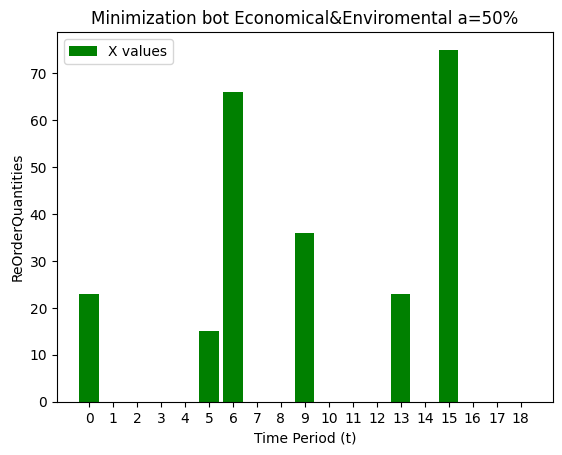

In [5]:
#Let's define a function in order to get X-Y in the pareto plane by just giving the alphas
mdl3 = Model(name = "Minimization bot Economical&Enviromental a=50%")
y = mdl3.binary_var_list(N, name ="y")
X = mdl3.integer_var_list(N, name = "X")

for t in range(N):
    mdl3.add_constraint(mdl3.sum((X[j]-D[j]) for j in range(t+1)) >=0)

for t in range(N):
    mdl3.add_constraint(X[t]<=M*y[t])

for t in range(N):
    mdl3.add_constraint(X[t]>=0)

mdl3.minimize(mdl3.sum(mdl3.sum((X[j]-D[j]) for j in range(t+1))*he + ke*y[t] for t in range(N))+ mdl3.sum(mdl3.sum((X[j]-D[j]) for j in range(t+1))*hc + kc*y[t] for t in range(N)))

sol3 = mdl3.solve()
sol3.display() 

for i in range(N):
    X_mix[i] = sol3.get_value(X[i])
    Y_mix[i] = sol3.get_value(y[i])

MixOptim_EnvCost = sum(sum((X_mix[j]-D[j]) for j in range(t+1))*he +  ke*Y_mix[t] for t in range(N))
MixOptim_EcoCost = sum(sum((X_mix[j]-D[j]) for j in range(t+1))*hc +  kc*Y_mix[t] for t in range(N))

BarChartPlot(X_mix, 'Minimization bot Economical&Enviromental a=50%')


##### 2.b Pareto-efficient solutions

How does this choice compare with the two anchor points? Plot in the objective space

In [6]:
def ParetoFronteer(alpha,he = he,ke = ke,hc = hc,kc = kc):
    mdl3 = Model(name = "Periodic review ENVIROMENTAL")
    y = mdl3.binary_var_list(N, name ="y")
    X = mdl3.integer_var_list(N, name = "X")

    for t in range(N):
        mdl3.add_constraint(mdl3.sum((X[j]-D[j]) for j in range(t+1)) >=0)

    for t in range(N):
        mdl3.add_constraint(X[t]<=M*y[t])

    for t in range(N):
        mdl3.add_constraint(X[t]>=0)

    mdl3.minimize(alpha*mdl3.sum(mdl3.sum((X[j]-D[j]) for j in range(t+1))*he + ke*y[t] for t in range(N))+ (1-alpha)*mdl3.sum(mdl3.sum((X[j]-D[j]) for j in range(t+1))*hc + kc*y[t] for t in range(N)))

    sol3 = mdl3.solve()
    # sol3.display() 

    for i in range(N):
        X_mix[i] = sol3.get_value(X[i])
        Y_mix[i] = sol3.get_value(y[i])

    MixOptim_EnvCost = sum(sum((X_mix[j]-D[j]) for j in range(t+1))*he +  ke*Y_mix[t] for t in range(N))
    MixOptim_EcoCost = sum(sum((X_mix[j]-D[j]) for j in range(t+1))*hc +  kc*Y_mix[t] for t in range(N))
    
    return MixOptim_EnvCost,MixOptim_EcoCost

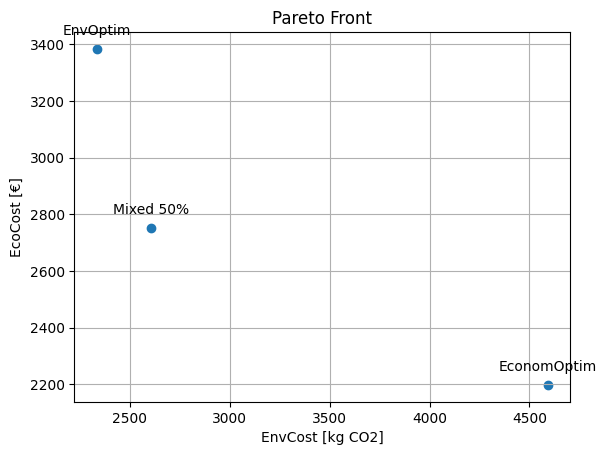

In [7]:
x_values = [EnvOptim_EnvCost, ParetoFronteer(0.5)[0], EconomOptim_EnvCost]
y_values = [EnvOptim_EcoCost, ParetoFronteer(0.5)[1], EconomOptim_EcoCost]
point_names = ['EnvOptim', 'Mixed 50%', 'EconomOptim']

plt.scatter(x_values, y_values)

for i, txt in enumerate(point_names):
    plt.annotate(txt, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('EnvCost [kg CO2]')
plt.ylabel('EcoCost [€]')
plt.title('Pareto Front')
plt.grid(True)

plt.show()

##### 2.c Pareto-efficient solutions

Populate the non-dominated solutions by shifting from the original weight value
(remember that AP are Pareto-efficient).


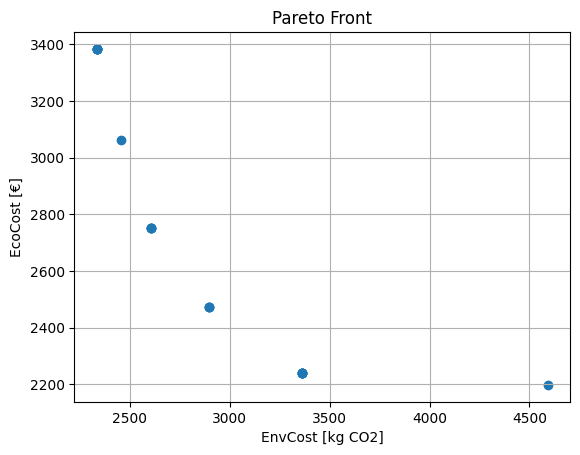

In [8]:
alphas = np.arange(0, 1.05, 0.05)
y_plot = np.zeros_like(alphas)
x_plot = np.zeros_like(alphas)


for i in range(len(alphas)):
    x_plot[i], y_plot[i] = ParetoFronteer(alphas[i],he = he,ke = ke,hc = hc,kc = kc)
plt.scatter(x_plot, y_plot)
plt.xlabel('EnvCost [kg CO2]')
plt.ylabel('EcoCost [€]')
plt.title('Pareto Front')
plt.grid(True)



##### 3.a Changing input factors:

Changing input factors: how do the previously-identified weights affect the new Pareto front
for increasing/decreasing cost/emission factors?

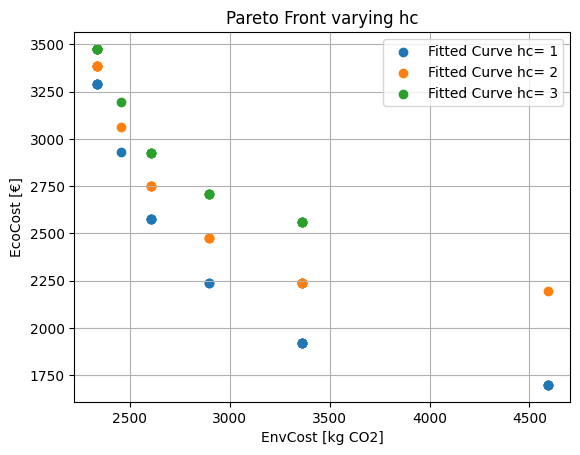

In [9]:
alphas = np.arange(0, 1.05, 0.05)
y_plot = np.zeros_like(alphas)
x_plot = np.zeros_like(alphas)

hc_1 = [1, 2, 3]

for k in range(len(hc_1)):

    for i in range(len(alphas)):
        x_plot[i], y_plot[i] = ParetoFronteer(alphas[i],he = he,ke = ke,hc = hc_1[k],kc = kc)

    plt.scatter(x_plot, y_plot, label=f'Fitted Curve hc= {hc_1[k]}')


plt.xlabel('EnvCost [kg CO2]')
plt.ylabel('EcoCost [€]')
plt.title('Pareto Front varying hc')
plt.legend()
plt.grid(True)

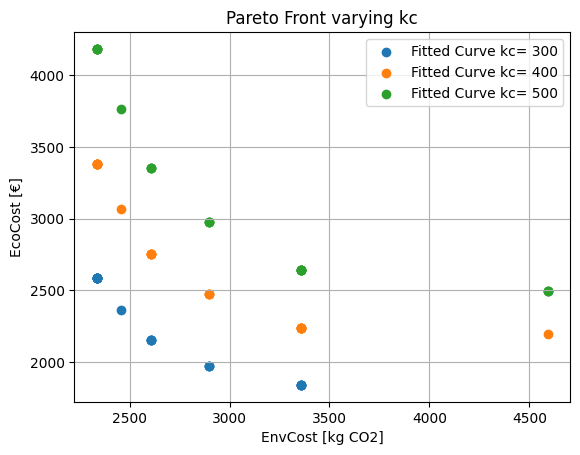

In [10]:

kc_1 = [300,400, 500]
alphas = np.arange(0, 1.05, 0.05)
y_plot = np.zeros_like(alphas)
x_plot = np.zeros_like(alphas)



for k in range(len(kc_1)):

    for i in range(len(alphas)):
        x_plot[i], y_plot[i] = ParetoFronteer(alphas[i],he = he,ke = ke,hc = hc,kc = kc_1[k])

    plt.scatter(x_plot, y_plot, label=f'Fitted Curve kc= {kc_1[k]}')



plt.xlabel('EnvCost [kg CO2]')
plt.ylabel('EcoCost [€]')
plt.title('Pareto Front varying kc')
plt.legend()
plt.grid(True)

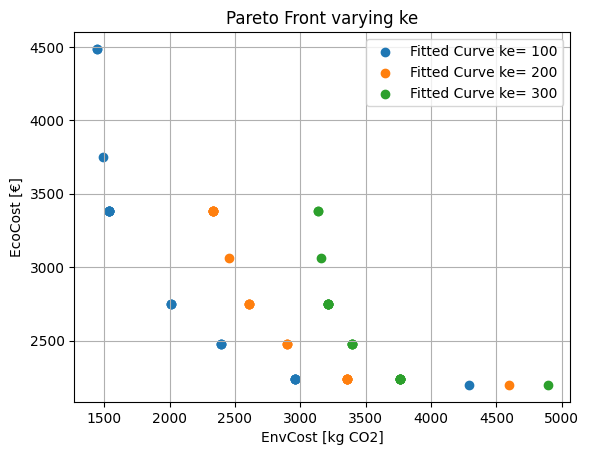

In [11]:
ke_1 = [100,200, 300]
alphas = np.arange(0, 1.05, 0.05)
y_plot = np.zeros_like(alphas)
x_plot = np.zeros_like(alphas)



for k in range(len(ke_1)):

    for i in range(len(alphas)):
        x_plot[i], y_plot[i] = ParetoFronteer(alphas[i],he = he,ke = ke_1[k],hc = hc,kc = kc)

    plt.scatter(x_plot, y_plot, label=f'Fitted Curve ke= {ke_1[k]}')



plt.xlabel('EnvCost [kg CO2]')
plt.ylabel('EcoCost [€]')
plt.title('Pareto Front varying ke')
plt.legend()
plt.grid(True)

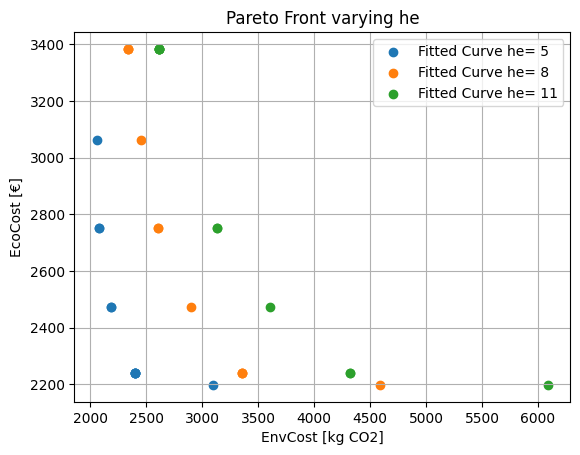

In [12]:
he_1 = [5, 8, 11]

alphas = np.arange(0, 1.1, 0.1)
y_plot = np.zeros_like(alphas)
x_plot = np.zeros_like(alphas)


for k in range(len(he_1)):

    for i in range(len(alphas)):
        x_plot[i], y_plot[i] = ParetoFronteer(alphas[i],he = he_1[k],ke = ke,hc = hc,kc = kc)

    plt.scatter(x_plot, y_plot, label=f'Fitted Curve he= {he_1[k]}')



plt.xlabel('EnvCost [kg CO2]')
plt.ylabel('EcoCost [€]')
plt.title('Pareto Front varying he')
plt.legend()
plt.grid(True)

